# Example of polarization line fitting

In this example we demonstrate the fitting of an inter-dot transition line (also known as polarization line). This fitting is useful for determining the tunnel coupling between two quantum dots. More theoretical background about this can be found in [L. DiCarlo et al., Phys. Rev. Lett. 92, 226801 (2004)].

Sjaak van diepen - sjaak.vandiepen@tno.nl

#### Import the modules used in this example.

In [25]:
import os
import matplotlib.pyplot as plt
#matplotlib inline

import qcodes
from qcodes.data.hdf5_format import HDF5Format
import qtt
from qtt.algorithms.tunneling import fit_pol_all, polmod_all_2slopes

#### Define some physical constants.

In [26]:
h = 4.14 # 4.14 ueV/GHz, planck's constant
kb = 8.6 # ueV/K, Boltzmann constant
leverarm = 83 # ueV/mV, can for example be determined by PAT
kT = 75e-3*kb # effective electron temperature in ueV

#### Load example data.

In [27]:
exampledatadir=os.path.join(qtt.__path__[0], 'exampledata')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)

dataset = qcodes.load_data('2017-02-14/10-36-06', formatter=HDF5Format())
delta = dataset.delta.ndarray
signal = dataset.signal.ndarray

#### Fit.

In [28]:
par_fit, _ = fit_pol_all(delta, signal, kT)

#### Plot the fit and the data.

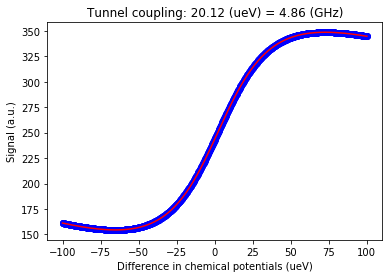

In [29]:
plt.plot(delta, signal, 'bo')
plt.plot(delta, polmod_all_2slopes(delta, par_fit, kT), 'r')
plt.title('Tunnel coupling: %.2f (ueV) = %.2f (GHz)' % (par_fit[0], par_fit[0]/h))
plt.xlabel('Difference in chemical potentials (ueV)')
plt.ylabel('Signal (a.u.)')